In [1]:
import numpy as np
import pandas as pd

In [2]:
hr=pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
col_names=hr.columns.tolist()
print('Column Names:')
print(col_names)

Column Names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [4]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
'''Checking for  null values'''
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
print('Shape of the dataset is: ', hr.shape)
print(' ')
print(hr.describe())

Shape of the dataset is:  (14999, 10)
 
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
2

In [7]:
'''Getting the values of the col department'''
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr['Department']=np.where(hr['Department'] =='support','technical',hr['Department'])
hr['Department']=np.where(hr['Department']=='IT','technical',hr['Department'])

In [9]:
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [12]:
'''GROUP by DEPT'''
hr.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [13]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


Text(0, 0.5, 'Frequency of Turnover')

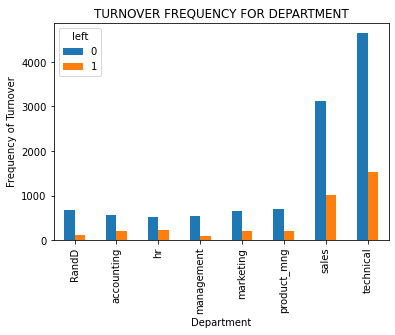

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.crosstab(hr.Department,hr.left).plot(kind='bar')
plt.title('TURNOVER FREQUENCY FOR DEPARTMENT')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

Text(0, 0.5, 'Proportion of Employees')

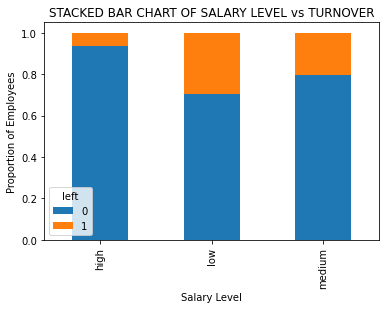

In [15]:
'SALARY STACKBAR DIAGRAM'
table=pd.crosstab(hr.salary,hr.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('STACKED BAR CHART OF SALARY LEVEL vs TURNOVER')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')

In [16]:
pd.crosstab(hr.Department,hr.left)

left,0,1
Department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


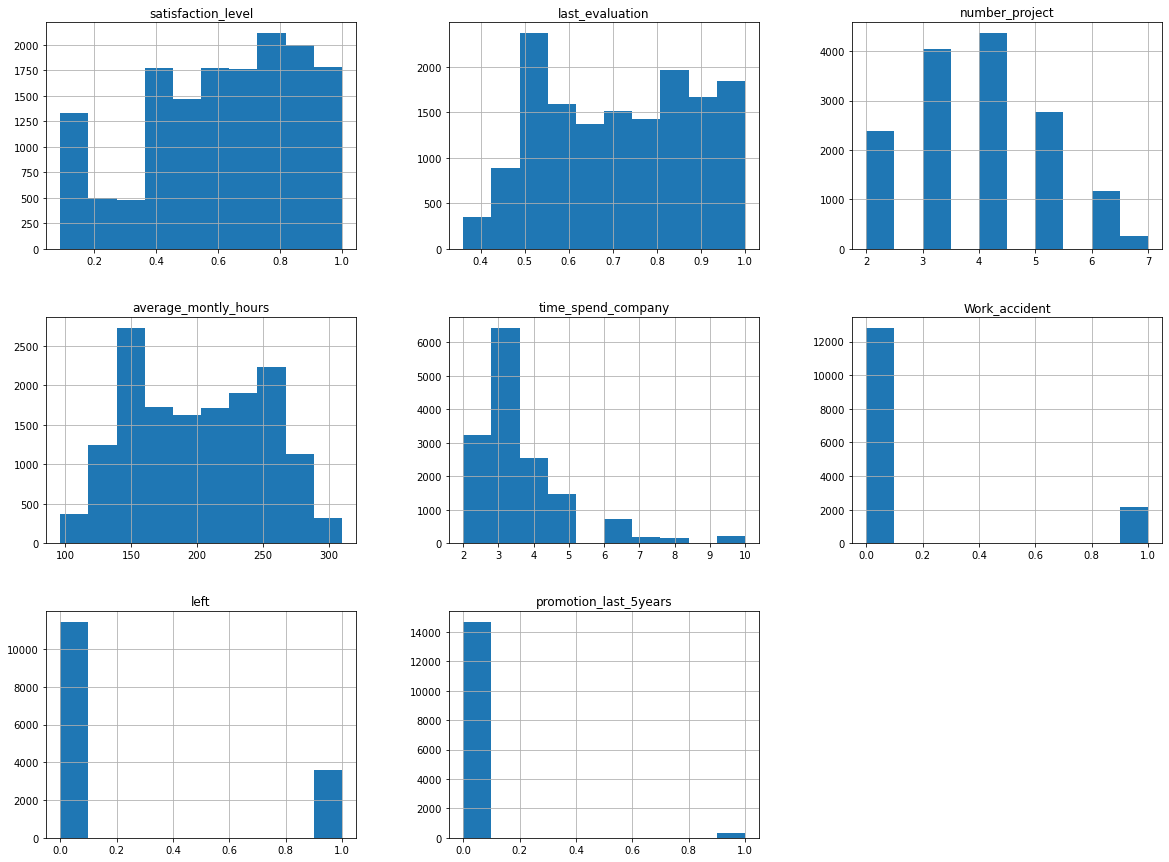

In [17]:
num_cols=10

hr.hist(bins=num_cols,figsize=(20,15))
plt.show()

In [18]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
'''CREATING DUMMY VARIABLES FOR CATEGORICAL VARIABLES'''
cat_var=['Department','salary']
for var in cat_var:
    cat_list='var'+ '_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1    

In [20]:
'''Since the actual categorical variables has to be removed aft creatind dummy variables'''
#Dropping Department and Salary
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [21]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [22]:
hr_var=hr.columns.values.tolist()
y=['left']
x=[i for i in hr_var if i not in y]

In [23]:
x

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [24]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'Department_RandD', 'Department_hr', 'Department_management', 'salary_high', 'salary_low'] 
x=hr[cols]
y=hr['left']

In [25]:
'''TRAIN TEST SPLIT '''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
'''FEATURE SCALING'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)

In [27]:
'''LOGISTIC REGRESSION MODEL'''
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
'''Accuracy'''
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(x_test))))

Logistic regression accuracy: 0.767


In [29]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [30]:
'''Prediction of all test data for validation'''
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Root mean square error: ',rmse)
r2score=r2_score(y_test,y_pred)
print('R2Score: ',r2score*100)

Root mean square error:  0.4822171018673367
R2Score:  -30.612492705472015


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy: 0.979


In [33]:
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Root mean square error: ',rmse)
r2score=r2_score(y_test,y_pred)
print('R2Score: ',r2score*100)

Root mean square error:  0.1460593486680443
R2Score:  88.01720250408513


# Support Vector Machine

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [35]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy: 0.916


In [36]:
y_pred=svc.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Root mean square error: ',rmse)
r2score=r2_score(y_test,y_pred)
print('R2Score: ',r2score*100)

Root mean square error:  0.2893671255228094
R2Score:  52.96751982853416


 FROM ALL THE ABOVE ALGORITHMS,RANDOM FOREST HAS HIGHEST ACCURACY

In [38]:
'''K FOLD'''
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.982


In [39]:
from sklearn.metrics import classification_report
'''FOR RANDOMFOREST MODEL'''
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2881
           1       0.95      0.96      0.95       869

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



Text(0.5, 1.0, 'Random Forest')

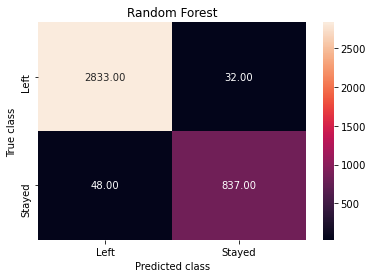

In [40]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics 
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

In [41]:
'''FOR LOGISTIC REGRESSION'''
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2881
           1       0.50      0.26      0.34       869

    accuracy                           0.77      3750
   macro avg       0.65      0.59      0.60      3750
weighted avg       0.73      0.77      0.74      3750



Text(0.5, 1.0, 'Logistic Regression')

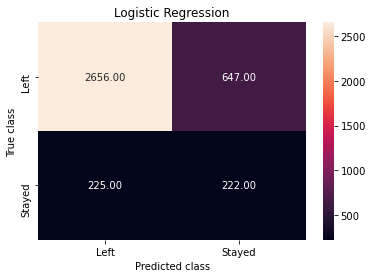

In [42]:
lr_y_pred = lr.predict(x_test)
lr_cm = metrics.confusion_matrix(lr_y_pred, y_test)
sns.heatmap(lr_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [43]:
'''FOR SUPPORT VECTOR MACHINE'''
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2881
           1       0.79      0.86      0.83       869

    accuracy                           0.92      3750
   macro avg       0.88      0.90      0.89      3750
weighted avg       0.92      0.92      0.92      3750



Text(0.5, 1.0, 'Support Vector Machine')

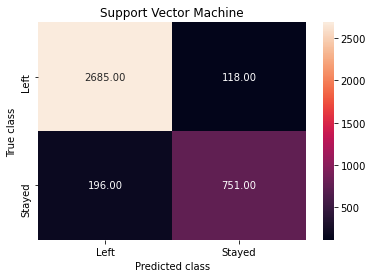

In [44]:
svc_y_pred = svc.predict(x_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test)
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')

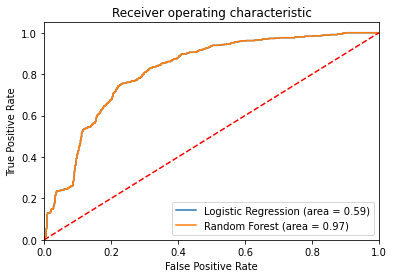

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#logistic regression
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
false_pred, true_pred, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

#random forest
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_false_pred, rf_true_pred, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(false_pred, true_pred, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(false_pred, true_pred, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()